In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
Data = pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
Data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
data =Data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [5]:
data.rename({'Age_08_04':'Age','Quarterly_Tax':'Q_tax'},axis =1,inplace = True)

In [6]:
data.head()

,Price,Age,KM,HP,cc,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [7]:
data.shape

(1436, 9)

In [8]:
data.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Q_tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [9]:
data.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Q_tax', 'Weight'], dtype='object')

In [10]:
data.dtypes

Price     int64
Age       int64
KM        int64
HP        int64
cc        int64
Doors     int64
Gears     int64
Q_tax     int64
Weight    int64
dtype: object

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   Q_tax   1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [12]:
data.isnull().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
Q_tax     0
Weight    0
dtype: int64

In [13]:
data[data.duplicated()].shape

(1, 9)

In [14]:
data[data.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Q_tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [15]:
data1 = data.drop_duplicates()

In [16]:
data1.shape

(1435, 9)

<Figure size 720x576 with 0 Axes>

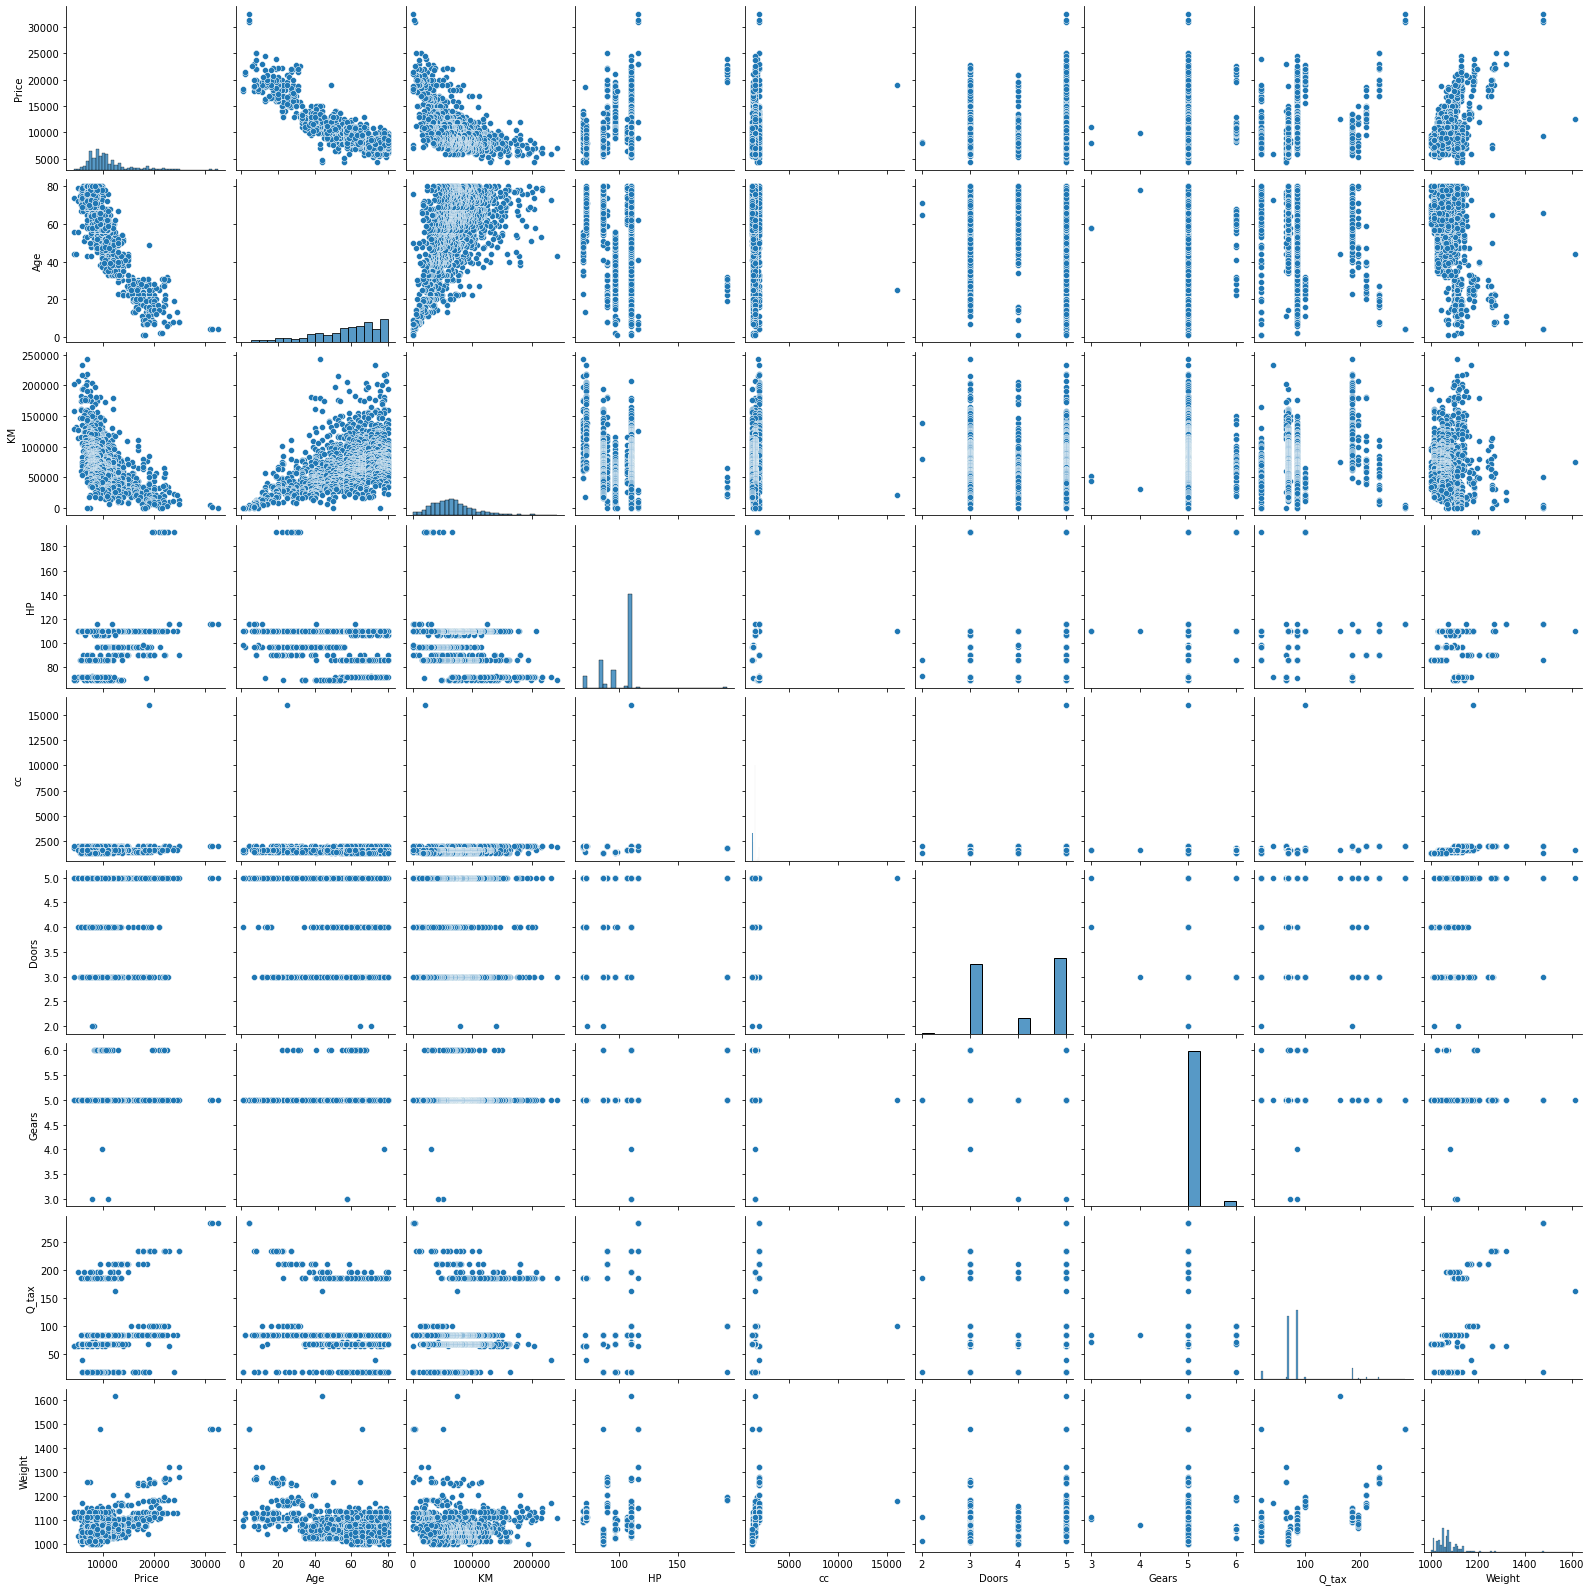

In [17]:
plt.figure(figsize=(10,8))
sns.pairplot(data1)
plt.show()

In [18]:
corr_matrix = data1.corr()
corr_matrix

,Price,Age,KM,HP,cc,Doors,Gears,Q_tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Q_tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


<AxesSubplot:>

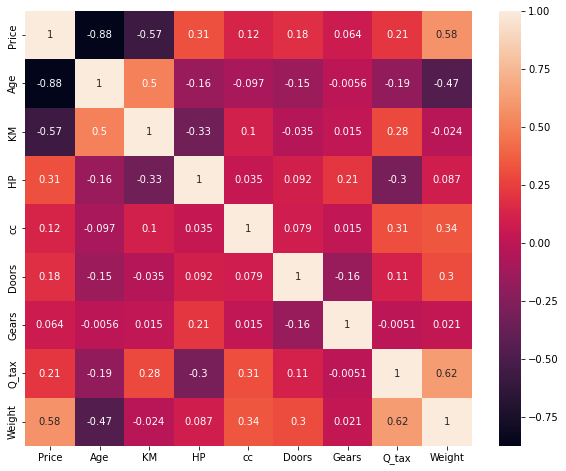

In [19]:
plt.figure(figsize =(10,8))
sns.heatmap(corr_matrix,annot= True)

In [20]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Q_tax+Weight',data=data).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:17:48   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
Q_tax          3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
Q_tax           3.949081
Weight         16.958632
dtype: float64

In [23]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -3.948666
Age         -46.511852
KM          -16.621622
HP           11.241018
cc           -1.344222
Doors        -0.040410
Gears         3.016007
Q_tax         3.014535
Weight       15.879803
dtype: float64 
 Intercept     8.241949e-05
Age          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
cc            1.790902e-01
Doors         9.677716e-01
Gears         2.606549e-03
Q_tax         2.619148e-03
Weight        2.048576e-52
dtype: float64


In [24]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

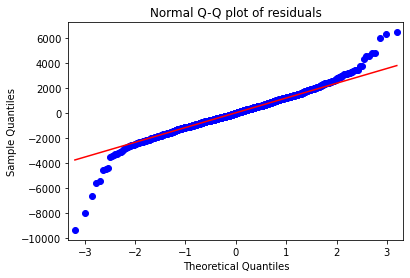

In [25]:
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

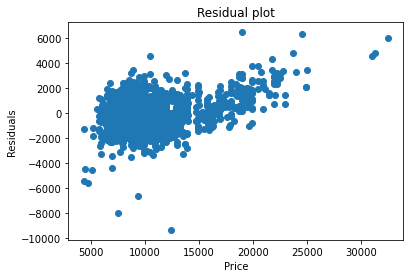

In [26]:
plt.scatter(x= data['Price'],y=model.resid)
plt.title('Residual plot')
plt.xlabel('Price')
plt.ylabel('Residuals')
plt.show()

In [27]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

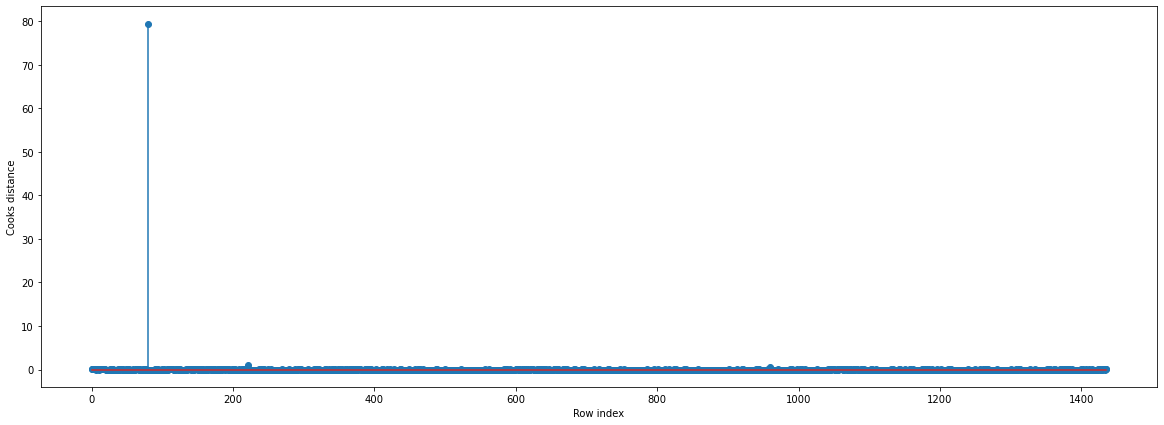

In [28]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [29]:
(np.argmax(c),np.max(c))

(80, 79.52010624138055)

In [30]:
data.shape

(1436, 9)

In [31]:
data[data.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,Q_tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [32]:
data_new = data

In [33]:
data1 = data_new.drop(data_new.index[[80]],axis=0).reset_index(drop=True)
data1                                     

,Price,Age,KM,HP,cc,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [34]:
model_1 =smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Q_tax+Weight',data =data1).fit()

In [35]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:17:49   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
Age         -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM            -0.0178      0.001    -13.973      0.000      -0.020      -0.015
HP            39.3463      2.911     13.516      0.000      33.636      45.057
cc            -2.5242      0.307     -8.216      0.000      -3.127      -1.922
Doors        -27.2285     39.241     -0.694      0.488    -104.206      49.749
Gears        523.9416    192.865      2.717      0.007     145.612     902.271
Q_tax          9.0440      1.425      6.348      0.000       6.249      11.839
Weight        20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model_influence1 = model_1.get_influence()
(c,_) = model_influence1.cooks_distance

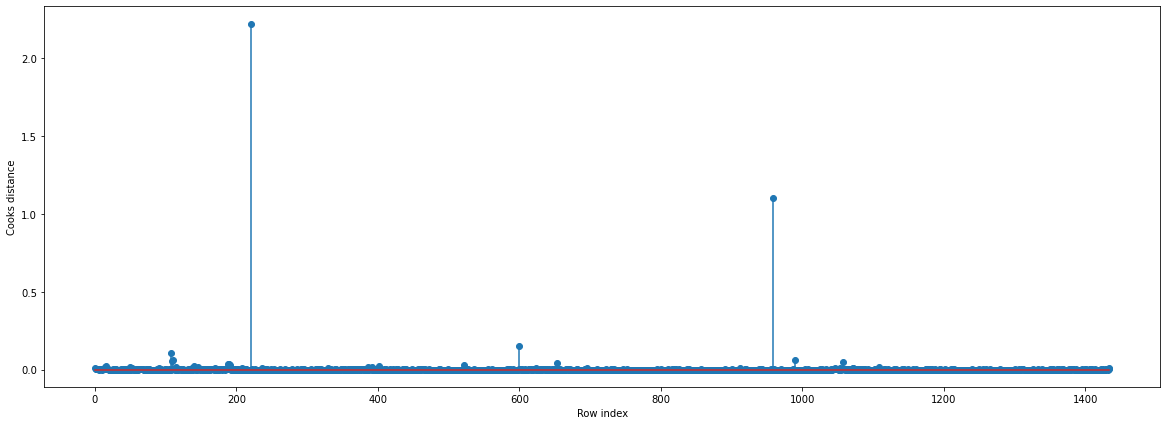

In [37]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [38]:
(np.argmax(c),np.max(c))

(220, 2.2244611713001508)

In [39]:
data2 = data1.drop(data1.index[[220]]).reset_index(drop=True)
data2

,Price,Age,KM,HP,cc,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [40]:
model_2 =smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Q_tax+Weight',data =data2).fit()

In [41]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1280.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:17:49   Log-Likelihood:                -12278.
No. Observations:                1434   AIC:                         2.457e+04
Df Residuals:                    1425   BIC:                         2.462e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.025e+04   1395.733     -7.346      0.000    -1.3e+04   -7514.512
Age         -116.5783      2.508    -46.475      0.000    -121.499    -111.658
KM            -0.0173      0.001    -13.966      0.000      -0.020      -0.015
HP            39.2932      2.816     13.953      0.000      33.769      44.817
cc            -3.2057      0.305    -10.511      0.000      -3.804      -2.607
Doors        -65.3718     38.152     -1.713      0.087    -140.212       9.468
Gears        485.0462    186.602      2.599      0.009     119.001     851.091
Q_tax          7.9664      1.382      5.762      0.000       5.254      10.678
Weight        25.0494      1.186     21.129      0.000      22.724      27.375
==============================================================================
Omnibus:                      197.976   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.342
Skew:                          -0.317   Prob(JB):                         0.00
Kurtosis:                       8.399   Cond. No.                     3.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
model_influence2 = model_2.get_influence()
(c,_) = model_influence2.cooks_distance

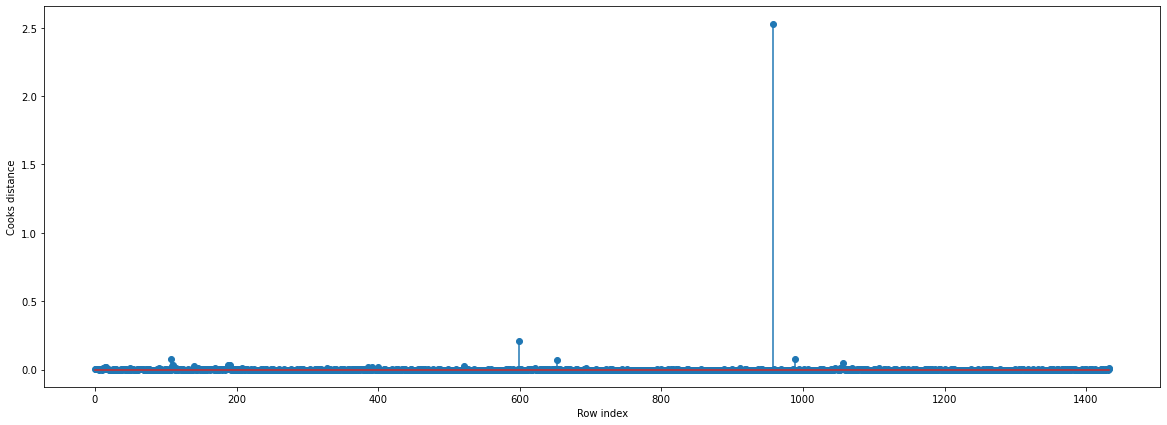

In [43]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [44]:
(np.argmax(c),np.max(c))

(958, 2.5312566930233107)

In [45]:
data3 = data2.drop(data2.index[[958]]).reset_index(drop =True)
data3

,Price,Age,KM,HP,cc,Doors,Gears,Q_tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [46]:
scaler = StandardScaler()
Scaled_data_df = scaler.fit_transform(data3.iloc[:,1:])

In [47]:
Scaled_data_df

array([[-1.77349446, -0.57560648, -0.76762828, ..., -0.140575  ,
         2.99242471,  1.88642391],
       [-1.77349446,  0.11628211, -0.76762828, ..., -0.140575  ,
         2.99242471,  1.88642391],
       [-1.71970329, -0.71624508, -0.76762828, ..., -0.140575  ,
         2.99242471,  1.88642391],
       ...,
       [ 0.80848164, -1.37464702, -1.03460512, ..., -0.140575  ,
        -0.44093507, -1.14711306],
       [ 0.75469047, -1.37731316, -1.03460512, ..., -0.140575  ,
        -0.44093507, -1.14711306],
       [ 1.07743749, -1.82828983,  0.56725592, ..., -0.140575  ,
        -1.65843853,  0.85502134]])

In [48]:
Scaled_data =pd.DataFrame(Scaled_data_df)

In [49]:
Scaled_data.columns = (data3.columns[1:])

In [50]:
Scaled_data

,Age,KM,HP,cc,Doors,Gears,Q_tax,Weight
0,-1.773494,-0.575606,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424
1,-1.773494,0.116282,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424
2,-1.719703,-0.716245,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424
3,-1.612121,-0.548572,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424
4,-1.396956,-0.801855,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.987542
...,...,...,...,...,...,...,...,...
1428,0.700899,-1.280586,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-0.944877
1429,0.862273,-1.321751,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-1.147113
1430,0.808482,-1.374647,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-1.147113
1431,0.754690,-1.377313,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-1.147113


In [51]:
final_data = pd.concat([data3['Price'],Scaled_data],axis=1)
final_data

,Price,Age,KM,HP,cc,Doors,Gears,Q_tax,Weight
0,13500,-1.773494,-0.575606,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424
1,13750,-1.773494,0.116282,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424
2,13950,-1.719703,-0.716245,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424
3,14950,-1.612121,-0.548572,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.886424
4,13750,-1.396956,-0.801855,-0.767628,2.313500,-1.084570,-0.140575,2.992425,1.987542
...,...,...,...,...,...,...,...,...,...
1428,7500,0.700899,-1.280586,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-0.944877
1429,10845,0.862273,-1.321751,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-1.147113
1430,8500,0.808482,-1.374647,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-1.147113
1431,7250,0.754690,-1.377313,-1.034605,-1.426292,-1.084570,-0.140575,-0.440935,-1.147113


In [52]:
final_model =smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Q_tax+Weight',data =final_data).fit()

In [53]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Wed, 22 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:17:50   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.072e+04     32.528    329.711      0.000    1.07e+04    1.08e+04
Age        -2082.4609     46.087    -45.185      0.000   -2172.867   -1992.055
KM          -637.3092     45.008    -14.160      0.000    -725.599    -549.020
HP           548.4881     41.133     13.334      0.000     467.800     629.176
cc          -710.4134     56.554    -12.562      0.000    -821.352    -599.475
Doors       -116.6942     35.691     -3.270      0.001    -186.707     -46.681
Gears         87.7137     34.139      2.569      0.010      20.745     154.682
Q_tax        214.1037     56.318      3.802      0.000     103.628     324.580
Weight      1515.0525     63.797     23.748      0.000    1389.906    1640.199
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                         3.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
final_model.params

Intercept    10724.824843
Age          -2082.460931
KM            -637.309198
HP             548.488062
cc            -710.413389
Doors         -116.694191
Gears           87.713651
Q_tax          214.103704
Weight        1515.052460
dtype: float64

In [72]:
final_model.pvalues

Intercept     0.000000e+00
Age          2.544361e-277
KM            1.105960e-42
HP            2.609365e-38
cc            2.124607e-34
Doors         1.102970e-03
Gears         1.029126e-02
Q_tax         1.497969e-04
Weight       2.687991e-105
dtype: float64

In [73]:
final_model.tvalues

Intercept    329.710597
Age          -45.185443
KM           -14.159841
HP            13.334460
cc           -12.561612
Doors         -3.269536
Gears          2.569307
Q_tax          3.801665
Weight        23.748027
dtype: float64

In [74]:
final_model.rsquared,final_model.rsquared_adj

(0.8851845904421739, 0.8845395600513997)

In [54]:
final_data.shape

(1433, 9)

In [55]:
x = final_data.drop('Price',axis=1)
y = final_data[['Price']]

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=7)

In [57]:
x_train.shape,x_test.shape

((1146, 8), (287, 8))

In [58]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [59]:
linear_model.coef_

array([[-2084.70299005,  -648.9106737 ,   550.84459354,  -697.69733054,
         -113.62521859,    88.28422022,   199.11056558,  1493.35949352]])

In [60]:
linear_model.intercept_

array([10727.65223094])

In [61]:
y_pred_train = linear_model.predict(x_train)
y_pred_train

array([[ 7749.8197402 ],
       [ 5535.56588478],
       [10915.89297112],
       ...,
       [10539.66997023],
       [ 8205.80417602],
       [18530.60810805]])

In [62]:
train_error = y_train - y_pred_train
train_error

,Price
1230,200.180260
1055,4964.434115
918,-920.892971
493,499.151560
109,1255.969900
...,...
211,-2282.921751
502,-1421.160303
537,1210.330030
1220,44.195824


In [63]:
y_pred_test =linear_model.predict(x_test)

In [64]:
test_error = y_test-y_pred_test
test_error

,Price
241,-1478.230811
249,-406.893006
779,511.335003
71,-1066.722492
652,-5620.564655
...,...
1237,1849.086806
964,-108.625107
1094,-40.283799
879,1311.119074


In [65]:
Mape_1 = mean_absolute_percentage_error(y_train,y_pred_train)
Mape_1

0.09209855502393866

In [66]:
Mape_2 = mean_absolute_percentage_error(y_test,y_pred_test)
Mape_2

0.09069589940982913

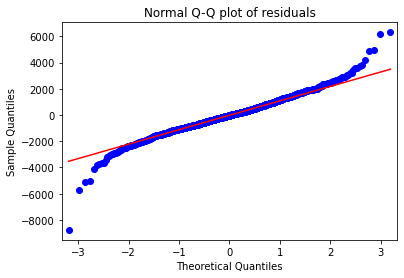

In [67]:
qqplot = sm.qqplot(final_model.resid,line="q")
plt.title('Normal Q-Q plot of residuals')
plt.show()

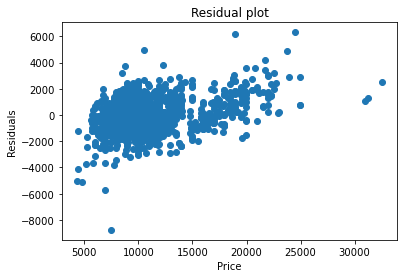

In [68]:
plt.scatter(x=final_data['Price'],y=final_model.resid)
plt.title('Residual plot')
plt.xlabel('Price')
plt.ylabel('Residuals')
plt.show()

In [75]:
final_model.params

Intercept    10724.824843
Age          -2082.460931
KM            -637.309198
HP             548.488062
cc            -710.413389
Doors         -116.694191
Gears           87.713651
Q_tax          214.103704
Weight        1515.052460
dtype: float64

### Price = 10724.82 - 2082.46 * Age - 637.30 * KM + 548.48 * HP - 710.41 * cc -116.69 * Doors + 87.71 * Gears + 214.10 * Q_tax + 1515.05 * Weight